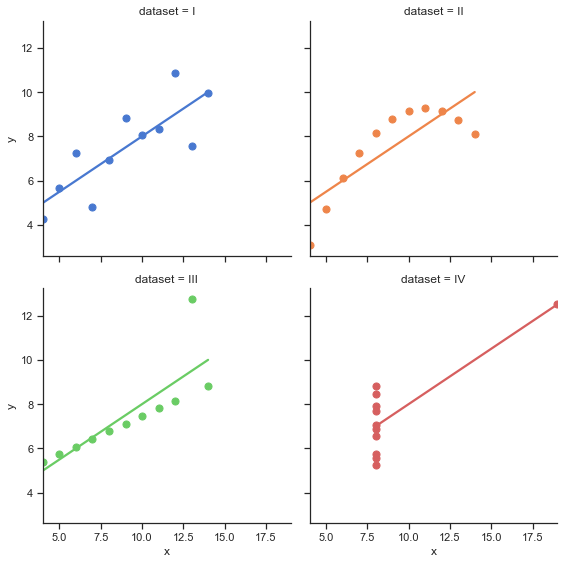

In [74]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

# Parsing Coronavirus Data

In [32]:
def get_csv(df, query, myvalues, out_name):
    out = df.query(query)
    out = out.pivot(columns='iso_code', values=myvalues)
    out.to_csv(out_name)
    return out, df

query = "iso_code in ['DEU', 'ESP']"
myvalues = 'total_cases'
#return_val = get_csv(df, query, myvalues, "test_out.csv")
#return_val[0]
#return_val[1]

In [19]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

df.to_csv("USA.cases.csv")
test = pd.concat([WhatWeWant, df], axis=1)
test.to_csv("test.csv")

NameError: name 'WhatWeWant' is not defined

In [7]:
WhatWeWant = pd.concat([RelevantCountries, NewYorkState, KC], axis=1)
#WhatWeWant['USA'] = WhatWeWant['USA'] - WhatWeWant['New York']
WhatWeWant['USA'] -= WhatWeWant['New York']
WhatWeWant = pd.concat([WhatWeWant, USATotal], axis=1)
WhatWeWant.to_csv("WhatWeWant.csv")

In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantCountries= df.query("iso_code in ['ITA', 'DEU', 'ESP', 'FRA','GBR','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
RelevantCountries.to_csv("RelevantCountries.csv")
USATotal = RelevantCountries['USA']

## New York State

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

NewYorkState =  df.query("state == 'New York'")
NewYorkState = NewYorkState.pivot(columns='state', values='cases')
NewYorkState = NewYorkState[NewYorkState.index > "2020-03-01"]
NewYorkState.to_csv("NewYorkState.csv")

In [4]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantCountries= df.query("iso_code in ['ITA', 'DEU', 'ESP', 'FRA','GBR','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
RelevantCountries.to_csv("RelevantCountries.csv")
USATotal = RelevantCountries['USA']

# Start here

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)

# Get data for relevant regions

## U.K., Sweden, U.S.

In [2]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantCountries= df.query("iso_code in ['GBR','SWE','USA']")
RelevantCountries = RelevantCountries.pivot(columns='iso_code', values='total_cases')
RelevantCountries = RelevantCountries[RelevantCountries.index > "2020-03-01"]
#RelevantCountries.to_csv("RelevantCountries.csv")

## Europe

In [3]:
EU = df.query("iso_code in ['DEU', 'DNK', 'FIN', 'NLD', 'NOR', 'ITA', 'ESP', 'FRA', 'BEL', 'LUX', 'CHE', 'AUT','SVN','PRT', 'POL', 'CZE', 'SVK','HUN','HRV','ROU','BGR','GRC','EST','LVA','LTU','IRL','MLT']")

EU = EU.pivot(columns='iso_code', values='total_cases')
EU = EU[EU.index > "2020-03-01"]
EU = EU.sum(axis=1)

In [4]:
# If we want the actual E.U...
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)
EUSeparate = df.query("iso_code in ['DEU', 'DNK', 'FIN', 'NLD', 'SWE', 'NOR', 'ITA', 'ESP', 'FRA', 'BEL', 'LUX', 'CYP', 'AUT','SVN','PRT', 'POL', 'CZE', 'SVK','HUN','HRV','ROU','BGR','GRC','EST','LVA','LTU','IRL','MLT']")
EUSeparate = EUSeparate.pivot(columns='iso_code', values='total_cases')
EEUSeparate = EUSeparate[EUSeparate.index > "2020-03-01"]
EUSeparate.to_csv("EUSeparate.csv")

NonEU= df.query("iso_code in ['GBR','CHE','BIH', 'SRB']")
NonEU = NonEU.pivot(columns='iso_code', values='total_cases')
NonEU = NonEU[NonEU.index > "2020-03-01"]
NonEU.to_csv("NonEU.csv")

## States

In [5]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Minnesota', 'Texas','Washington']")
RelevantStates = RelevantStates.pivot(columns='state', values = 'cases')
RelevantStates = RelevantStates[RelevantStates.index > "2020-03-01"]

## New York City and King County

In [6]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

KC = df.query("(state == 'Washington') & (county in ['King'])")
KC= KC.pivot(columns='county', values='cases')
KC = KC[KC.index > "2020-03-01"]

NYC = df.query("(state == 'New York') & (county in ['New York City'])")
NYC= NYC.pivot(columns='county', values='cases')
NYC = NYC[NYC.index > "2020-03-01"]

## Consolodate and output

In [7]:
Regions = pd.concat([RelevantCountries, RelevantStates, NYC, KC, EU], axis=1)
Regions.to_csv("Regions.cases.csv")

# State combinations

# County combinations

In [12]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

In [13]:
Arizona = df.query("(state == 'Arizona') & (county in ['Maricopa', 'Pima'])")
Arizona= Arizona.pivot(columns='county', values='deaths')
Arizona = Arizona[Arizona.index > "2020-03-25"]

Florida = df.query("(state == 'Florida') & (county in ['Duval','Miami-Dade', 'Broward', 'Leon'])")
Florida= Florida.pivot(columns='county', values='deaths')
Florida = Florida[Florida.index > "2020-03-25"]

Texas = df.query("(state == 'Texas') & (county in ['Bexar','Dallas', 'Harris', 'Travis'])")
Texas= Texas.pivot(columns='county', values='deaths')
Texas = Texas[Texas.index > "2020-03-25"]

HotSpotCities = pd.concat([Arizona, Florida, Texas], axis=1)
HotSpotCities.to_csv("HotSpotCities.deaths.csv")

## Cuomo's banned list

In [7]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

CuomoBanned = df.query("state in ['California', 'Georgia', 'Idaho', 'Iowa', 'Louisiana', 'Mississippi', 'Nevada', 'Tennessee', 'Alabama', 'Arkansas', 'Arizona', 'Florida', 'North Carolina', 'South Carolina', 'Texas', 'Utah']")
CuomoBanned = CuomoBanned.pivot(columns='state', values = 'cases')
CuomoBanned = CuomoBanned[CuomoBanned.index > "2020-03-01"]
CuomoBannedSum=CuomoBanned.sum(axis=1)
CuomoBanned.to_csv("CuomoBanned.cases.csv")

## Tri-State area

In [3]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

TriState = df.query("state in ['Connecticut', 'New Jersey', 'New York']")
TriState = TriState.pivot(columns='state', values = 'cases')
TriState = TriState[TriState.index > "2020-03-01"]
TriState.to_csv("TriState.cases.csv")

## Relevant Regions (where people on my distribution list live)

### Cases

#### Relevant States

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Ohio', 'Florida', 'Massachusetts','Maryland','New York','North Carolina','Indiana','Illinois','Nevada','Washington','Oregon','California']")
RelevantStates = RelevantStates.pivot(columns='state', values = 'cases')
RelevantStates = RelevantStates[RelevantStates.index > "2020-03-25"]

#### Canada and Italy

In [15]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

CandI = df.query("iso_code in ['CAN', 'ITA']")
CandI = CandI.pivot(columns='iso_code', values='total_cases')
CandI = CandI[CandI.index > "2020-03-25"]

#### Consolodate and output

In [16]:
RelevantStates = pd.concat([RelevantStates, CandI], axis=1)
RelevantStates.to_csv("RelevantStates.cases.csv")

### Deaths

#### Relevant States

In [11]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RelevantStates = df.query("state in ['Ohio', 'Florida', 'Massachusetts','Maryland','New York','North Carolina','Indiana','Illinois','Nevada','Washington','Oregon','California']")
RelevantStates = RelevantStates.pivot(columns='state', values='deaths')
#RelevantStates = RelevantStates[RelevantStates.index > "2020-03-20"]
RelevantStates.to_csv("RelevantStates.deaths.csv")

#### Canada and Italy

In [8]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

CandI = df.query("iso_code in ['CAN', 'ITA']")
CandI = CandI.pivot(columns='iso_code', values='total_deaths')
CandI = CandI[CandI.index > "2020-03-25"]

#### Consolodate and output

In [9]:
RelevantStates = pd.concat([RelevantStates, CandI], axis=1)
RelevantStates.to_csv("RelevantStates.deaths.csv")

## Red vs. blue

### Voted for Trump vs. Clinton

In [77]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Trumpvote = df.query("state in ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'South Dakota','Tennessee', 'Texas', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming']")
Trumpvote = Trumpvote.pivot(columns='state', values='deaths')
Trumpvote = Trumpvote[Trumpvote.index > "2020-03-05"]
TrumpvoteSum = Trumpvote.sum(axis=1)
#TrumpvoteSums.to_csv("Trumpvote.deaths.csv")



Clintonvote = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Ill', 'Maine', 'Maryland','Massachusetts', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Oregon','Rhode Island', 'Vermont', 'Virginia', 'Washington']")
Clintonvote = Clintonvote.pivot(columns='state', values='deaths')
Clintonvote = Clintonvote[Clintonvote.index > "2020-03-05"]
ClintonvoteSum = Clintonvote.sum(axis=1)
#ClintonvoteSums.to_csv("Clintonvote.deaths.csv")


### Republican vs. Democratic Governors

In [64]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RepStates = df.query("state in ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'West Virginia', 'Wyoming']")
RepStates = RepStates.pivot(columns='state', values='deaths')
RepStates = RepStates[RepStates.index > "2020-03-05"]
RepStatesSum = RepStates.sum(axis=1)
RepStatesSum.to_csv("RepStates.deaths.csv")


url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

DemStates = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Virginia', 'Washington', 'Wisconsin']")
DemStates = DemStates.pivot(columns='state', values='deaths')
DemStates = DemStates[DemStates.index > "2020-03-05"]
DemStatesSum=DemStates.sum(axis=1)
DemStatesSum.to_csv("DemStates.deaths.csv")

In [71]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

RGovList = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho','Indiana', 'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 
 'Missouri', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 
 'Texas', 'Utah', 'Vermont', 'West Virginia', 'Wyoming']

RepStates = df.query("state in @RGovList")
RepStates = RepStates.pivot(columns='state', values='deaths')
RepStates = RepStates[RepStates.index > "2020-03-05"]
RepStatesSum = RepStates.sum(axis=1)
RepStatesSum.to_csv("RepStates.deaths.csv")


url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

DemStates = df.query("state in ['California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Virginia', 'Washington', 'Wisconsin']")
DemStates = DemStates.pivot(columns='state', values='deaths')
DemStates = DemStates[DemStates.index > "2020-03-05"]
DemStatesSum=DemStates.sum(axis=1)
DemStatesSum.to_csv("DemStates.deaths.csv")

### Consolodate and output

In [13]:
AllData = pd.concat([RepStatesSum, DemStatesSum, TrumpvoteSum, ClintonvoteSum], axis=1)
AllData.to_csv("RedBlue.deaths.csv")

## All red or all blue

### Cases

In [17]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)


repgovstates = {'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana',
                'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire',
                'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
                'Vermont', 'West Virginia', 'Wyoming'}

tvstates = {'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa',
            'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
            'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
            'Utah', 'West Virginia', 'Wisconsin', 'Wyoming'}


RedRedStates = repgovstates & tvstates
RedRed = df.query("state in @RedRedStates")
RedRed = RedRed.pivot(columns='state', values='cases')
RedRed = RedRed[RedRed.index > "2020-03-05"]
RedRedSum = RedRed.sum(axis=1)


demgovstates = {'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas',
                'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey',
                'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania',
                'Rhode Island', 'Virginia', 'Washington', 'Wisconsin'}

hvstates = {'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Ill', 'Maine', 'Maryland'
            'Massachusetts', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
            'Oregon','Rhode Island', 'Vermont', 'Virginia', 'Washington'}

BlueBlueStates = demgovstates & hvstates
BlueBlue = df.query("state in @BlueBlueStates")
BlueBlue = BlueBlue.pivot(columns='state', values='cases')
BlueBlue = BlueBlue[BlueBlue.index > "2020-03-05"]
BlueBlueSum = BlueBlue.sum(axis=1)


RedBlueC = pd.concat([RedRedSum, BlueBlueSum], axis=1)
# RedBlue.to_csv("RedBlue.cases.csv")




### Deaths

In [18]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)


repgovstates = {'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana',
                'Iowa', 'Maryland', 'Massachusetts', 'Mississippi', 'Missouri', 'Nebraska', 'New Hampshire',
                'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
                'Vermont', 'West Virginia', 'Wyoming'}

tvstates = {'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Idaho', 'Indiana', 'Iowa',
            'Kansas', 'Kentucky', 'Louisiana', 'Michigan', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina',
            'North Dakota', 'Ohio', 'Oklahoma', 'Pennsylvania', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
            'Utah', 'West Virginia', 'Wisconsin', 'Wyoming'}


RedRedStates = repgovstates & tvstates
RedRed = df.query("state in @RedRedStates")
RedRed = RedRed.pivot(columns='state', values='deaths')
RedRed = RedRed[RedRed.index > "2020-03-05"]
RedRedSum = RedRed.sum(axis=1)


demgovstates = {'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Illinois', 'Kansas',
                'Kentucky', 'Louisiana', 'Maine', 'Michigan', 'Minnesota', 'Montana', 'Nevada', 'New Jersey',
                'New Mexico', 'New York', 'North Carolina', 'Oregon', 'Pennsylvania',
                'Rhode Island', 'Virginia', 'Washington', 'Wisconsin'}

hvstates = {'California', 'Colorado', 'Connecticut', 'Delaware', 'Hawaii', 'Ill', 'Maine', 'Maryland'
            'Massachusetts', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
            'Oregon','Rhode Island', 'Vermont', 'Virginia', 'Washington'}

BlueBlueStates = demgovstates & hvstates
BlueBlue = df.query("state in @BlueBlueStates")
BlueBlue = BlueBlue.pivot(columns='state', values='deaths')
BlueBlue = BlueBlue[BlueBlue.index > "2020-03-05"]
BlueBlueSum = BlueBlue.sum(axis=1)


RedBlueD = pd.concat([RedRedSum, BlueBlueSum], axis=1)
# RedBlue.to_csv("RedBlue.deaths.csv")

RedBlueCD = pd.concat([RedBlueC, RedBlueD], axis=1)
RedBlueCD.to_csv("RedBlueCD.csv")



## Opening States (states that were dubious in terms of virus-supression measures)

### Cases

In [12]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

#OpeningStates = df.query("state in ['South Carolina','Georgia','Florida','Alabama','Mississippi','Louisiana','Tennessee','South Dakota','Iowa','Nebraska','Texas','Utah']")
OpeningStates = df.query("state in ['Arizona','Texas','South Carolina','North Carolina','Florida','Georgia']")
OpeningStates = OpeningStates.pivot(columns='state', values='cases')
OpeningStates = OpeningStates[OpeningStates.index > "2020-03-20"]
OpeningStates.to_csv("OpeningStates.cases.csv")

### Deaths

In [7]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

#OpeningStates = df.query("state in ['South Carolina','Georgia','Florida','Alabama','Mississippi','Louisiana','Tennessee','South Dakota','Iowa','Nebraska','Texas','Utah']")
OpeningStates = df.query("state in ['Arizona','Texas','South Carolina','North Carolina','Florida','Georgia']")
OpeningStates = OpeningStates.pivot(columns='state', values='deaths')
OpeningStates = OpeningStates[OpeningStates.index > "2020-03-20"]
OpeningStates.to_csv("OpeningStates.deaths.csv")

## Hawaii

In [6]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Hawaii = df.query("state in ['Hawaii']")
Hawaii = Hawaii.pivot(columns='state', values='cases')
Hawaii = Hawaii[Hawaii.index > "2020-03-20"]
Hawaii.to_csv("Hawaii.cases.csv")

# Country combinations

## Scandinavia+: Germany, Denmark, Sweden, Finland, Netherlands, Norway

### Cases

In [6]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Scandinavia = df.query("iso_code in ['DEU', 'DNK', 'SWE', 'FIN', 'NLD', 'NOR']")
Scandinavia = Scandinavia.pivot(columns='iso_code', values='total_cases')
Scandinavia = Scandinavia[Scandinavia.index > "2020-03-01"]
Scandinavia.to_csv("Scandinavia.cases.csv")

### Deaths

In [7]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Scandinavia = df.query("iso_code in ['DEU', 'DNK', 'SWE', 'FIN', 'NLD', 'NOR']")
Scandinavia = Scandinavia.pivot(columns='iso_code', values='total_deaths')
Scandinavia = Scandinavia[Scandinavia.index > "2020-03-01"]
Scandinavia.to_csv("Scandinavia.deaths.csv")

## Australia, New Zealand, and some Asian countries

### Get Australia, New Zealand, Singapore, South Korea, Taiwan

In [11]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

ANZA = df.query("iso_code in ['AUS', 'JPN', 'NZL', 'KOR', 'TWN']")
ANZA = ANZA.pivot(columns='iso_code', values='total_cases')
ANZA = ANZA[ANZA.index > "2020-03-01"]
ANZA.to_csv("ANZA.cases.csv")

# County combinations

In [3]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

## Washington State counties

### Cases

In [2]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

#WashCases = df.query("(state == 'Washington') & (county in ['Clark','King','Kitsap','Pierce','Snohomish','Spokane','Thurston'])")
WashCases = df.query("(state == 'Washington') & (county in ['Benton','Franklin','Jefferson','Kitsap','Lewis','Skagit','Thurston', 'Whatcom','Yakima'])")

WashCases= WashCases.pivot(columns='county', values='cases')
WashCases = WashCases[WashCases.index > "2020-03-20"]
WashCases.to_csv("Wash.Cases.csv")

### Deaths

In [8]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

WashDeaths = df.query("(state == 'Washington') & (county in ['Clark','King','Kitsap','Pierce','Snohomish','Spokane','Thurston'])")
WashDeaths= WashDeaths.pivot(columns='county', values='deaths')
WashDeaths = WashDeaths[WashDeaths.index > "2020-03-20"]
WashDeaths.to_csv("WashDeaths.csv")

## California counties

### Bay Area deaths and cases

In [11]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

In [12]:
BayArea = df.query("(state == 'California') & (county in ['Marin','Contra Costa','San Francisco','San Mateo', 'Santa Clara', 'Alameda'])")
BayArea = BayArea.pivot(columns='county', values='deaths')
BayArea = BayArea[BayArea.index > "2020-03-20"]
BayArea["sums"] = BayArea.sum(axis=1)
BayArea.to_csv("BayArea.deaths.csv")

In [13]:
BayArea = df.query("(state == 'California') & (county in ['Marin','Contra Costa','San Francisco','San Mateo', 'Santa Clara', 'Alameda'])")
BayArea = BayArea.pivot(columns='county', values='cases')
BayArea = BayArea[BayArea.index > "2020-03-24"]
BayArea["sums"] = BayArea.sum(axis=1)
BayArea.to_csv("BayArea.cases.csv")

### L.A. Area deaths and cases

In [14]:
SoCal = df.query("(state == 'California') & (county in ['Ventura','Los Angeles','Orange','Riverside','San Bernardino'])")
SoCal = SoCal.pivot(columns='county', values='cases')
SoCal = SoCal[SoCal.index > "2020-03-20"]
SoCal["sums"] = SoCal.sum(axis=1)
SoCal.to_csv("SoCal.cases.csv")

In [15]:
SoCal = df.query("(state == 'California') & (county in ['Ventura','Los Angeles','Orange','Riverside','San Bernardino'])")
SoCal = SoCal.pivot(columns='county', values='deaths')
SoCal = SoCal[SoCal.index > "2020-03-24"]
SoCal["sums"] = SoCal.sum(axis=1)
SoCal.to_csv("SoCal.deaths.csv")
# cali.sample(10)

### Other large CA county cases

In [19]:
CalCo = df.query("(state == 'California') & (county in ['Santa Cruz', 'San Diego','Sacramento','Fresno'])")
CalCo = CalCo.pivot(columns='county', values='cases')
CalCo = CalCo[CalCo.index > "2020-03-24"]
# CalCo["sums"] = CalCo.sum(axis=1)
CalCo.to_csv("CalCo.cases.csv")
# cali.sample(10)

## Big cities (Part 1)

In [14]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

In [15]:
BostonArea = df.query("(state == 'Massachusetts') & (county in ['Suffolk','Middlesex'])")
BostonArea = BostonArea.pivot(columns='county', values='cases')
BostonArea = BostonArea[BostonArea.index > "2020-03-24"]
Boston = BostonArea.sum(axis=1)

Philadelphia = df.query("(state == 'Pennsylvania') & (county == 'Philadelphia')")
Philadelphia = Philadelphia.pivot(columns='county', values='cases')
Philadelphia = Philadelphia[Philadelphia.index > "2020-03-25"]

Miami = df.query("(state == 'Florida') & (county == 'Miami-Dade')")
Miami = Miami.pivot(columns='county', values='cases')
Miami = Miami[Miami.index > "2020-03-25"]

Detroit = df.query("(state == 'Michigan') & (county == 'Wayne')")
Detroit = Detroit.pivot(columns='county', values='cases')
Detroit = Detroit[Detroit.index > "2020-03-25"]

Denver = df.query("(state == 'Colorado') & (county == 'Denver')")
Denver = Denver.pivot(columns='county', values='cases')
Denver = Denver[Denver.index > "2020-03-25"]

Portland = df.query("(state == 'Oregon') & (county == 'Multnomah')")
Portland = Portland.pivot(columns='county', values='cases')
Portland = Portland[Portland.index > "2020-03-25"]

Seattle = df.query("(state == 'Washington') & (county == 'King')")
Seattle = Seattle.pivot(columns='county', values='cases')
Seattle = Seattle[Seattle.index > "2020-03-25"]

BigCities = pd.concat([Boston, Philadelphia, Miami, Detroit, Denver, Portland, Seattle], axis=1)
BigCities.to_csv("BigCities.cases.csv")

## Big cities (Part 2)

In [16]:
BigCities = df.query("county in ['New York City', 'Los Angeles', 'Hennepin']")
BigCities = BigCities.pivot(columns='county', values='cases')
BigCities = BigCities[BigCities.index > "2020-03-25"]

Chicago = df.query("(state == 'Illinois') & (county == 'Cook')")
Chicago = Chicago.pivot(columns='county', values='cases')
Chicago = Chicago[Chicago.index > "2020-03-25"]

Atlanta = df.query("(state == 'Georgia') & (county == 'Fulton')")
Atlanta = Atlanta.pivot(columns='county', values='cases')
Atlanta = Atlanta[Atlanta.index > "2020-03-25"]


Houston = df.query("(state == 'Texas') & (county == 'Harris')")
Houston = Houston.pivot(columns='county', values='cases')
Houston = Houston[Houston.index > "2020-03-25"]

Louisville = df.query("(state == 'Kentucky') & (county == 'Jefferson')")
Louisville = Louisville.pivot(columns='county', values='cases')
Louisville = Louisville[Louisville.index > "2020-03-25"]

BigCities = pd.concat([BigCities, Chicago, Atlanta, Houston, Louisville], axis=1)
BigCities.to_csv("BigCities.cases.csv")

# One-shots

## Counties

In [12]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

# Hou = df.query("(state == 'Texas') & (county in ['Harris'])")
# Hou = Hou.pivot(columns='county', values='deaths')

# Fla = df.query("(state == 'Florida') & (county in ['Duval', 'Miami-Dade'])")
# Fla = Fla.pivot(columns='county', values='deaths')

# Phx = df.query("(state == 'Arizona') & (county in ['Maricopa'])")
# Phx = Phx.pivot(columns='county', values='deaths')

# Tulsa = df.query("(state == 'Oklahoma') & (county in ['Tulsa'])")
# Tulsa = Tulsa.pivot(columns='county', values='cases')

NYC = df.query("(state == 'New York') & (county in ['New York City'])")
NYC = NYC.pivot(columns='county', values='deaths')

# OneShotCounties = pd.concat([Hou, Phx, Fla], axis=1)


NYC.to_csv("NYC.deaths.csv")


## States

In [9]:
url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

OneShotStates = df.query("state in ['Kansas', 'Washington']")
OneShotStates = OneShotStates.pivot(columns='state', values='cases')
OneShotStates = OneShotStates[OneShotStates.index > "2020-03-25"]
OneShotStates.to_csv("OneShotStates.cases.csv")

## Countries

In [13]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url, index_col="date", parse_dates=True)

Italy = df.query("iso_code in ['ITA']")
Italy = Italy.pivot(columns='iso_code', values='total_deaths')
# Italy = Italy[Italy.index > "2020-03-25"]
Italy.to_csv("Italy.deaths.csv")

# Coronadatascraper (for future use?)

In [39]:
# from https://coronadatascraper.com/
# data here: https://coronadatascraper.com/timeseries-tidy.csv.zip
#cds = pd.read_csv("timeseries-tidy.csv", index_col='date', parse_dates=True)
#cds.query("(county == 'King County') & (state == 'Washington') & (type == 'cases')").sort_values(by='date')

## hopkins

In [ ]:
# data here: https://github.com/CSSEGISandData/COVID-19


## usafacts

#### hi dad

In [40]:
ufacts = "covid_confirmed_usafacts.csv"
fcts = pd.read_csv(ufacts)

FileNotFoundError: [Errno 2] File covid_confirmed_usafacts.csv does not exist: 'covid_confirmed_usafacts.csv'

In [18]:
fcts

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,74,84,91,93,103,103,110,110,120,127
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,222,224,227,231,243,244,254,254,260,262
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,59,61,67,69,74,79,79,81,85,90
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,46,46,46,46,46,49,50,50,50,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,12,13,13,13,14,15,16,16,16,24
3191,56039,Teton County,WY,56,0,0,0,0,0,0,...,67,67,67,68,68,68,69,69,69,100
3192,56041,Uinta County,WY,56,0,0,0,0,0,0,...,7,7,7,7,7,7,8,8,8,11
3193,56043,Washakie County,WY,56,0,0,0,0,0,0,...,5,5,5,5,5,5,6,13,13,16


In [21]:
kc = fcts.query("countyFIPS == 53033")
kc

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
3019,53033,King County,WA,53,1,1,1,1,1,1,...,7007,7068,7137,7212,7290,7325,7426,7472,7515,7565


In [23]:
kc.melt(id_vars = ["countyFIPS", "County Name", "State", "stateFIPS"], var_name="date")

,countyFIPS,County Name,State,stateFIPS,date,value
0,53033,King County,WA,53,1/22/20,1
1,53033,King County,WA,53,1/23/20,1
2,53033,King County,WA,53,1/24/20,1
3,53033,King County,WA,53,1/25/20,1
4,53033,King County,WA,53,1/26/20,1
5,53033,King County,WA,53,1/27/20,1
6,53033,King County,WA,53,1/28/20,1
7,53033,King County,WA,53,1/29/20,1
8,53033,King County,WA,53,1/30/20,1
9,53033,King County,WA,53,1/31/20,1
